<a href="https://colab.research.google.com/github/alexandergribenchenko/Data_Science_Toolkit/blob/main/Classification_Metrics/DS_OW_01_M%C3%A9tricas_de_Clasificaci%C3%B3nV_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Métricas de Clasificación**

## A. Librerías para importar

In [1]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## B. Función de graficación de la matriz de confusión

In [2]:
def ordered_confusion_matrix(input_true, input_pred):
  tn, fp, fn, tp = confusion_matrix(input_true, input_pred).ravel()
  ordered_cm = np.array([[tp,fn], [fp,tn]])
  ordered_cm
  x_axis_labels = ['Positive','Negative'] # labels for x-axis
  y_axis_labels = ['Positive','Negative'] # labels for y-axis

  # create seabvorn heatmap with required labels
  ax = sns.heatmap(ordered_cm, xticklabels=x_axis_labels, yticklabels=y_axis_labels, cmap='coolwarm', annot=True)
  ax.set_ylabel('Real Label', size=25)
  ax.set_xlabel( 'Predicted Label', size=25)
  # ax.xaxis.tick_top()
  ax.xaxis.set_ticks_position('top')
  ax.xaxis.set_label_position('top')

# Caso 01. Dataset desbalanceado: benchmark todo negativo

In [44]:
y_true = ['perro', 'perro', 'gato', 'perro', 'gato', 'perro', 'perro', 'perro', 'perro', 'gato']
y_pred = ['gato', 'gato', 'perro', 'perro', 'gato', 'perro', 'gato', 'perro', 'perro', 'perro']

In [37]:
y_true = [0, 0, 1, 0, 1, 0, 0, 0, 0, 1]
y_pred = [1, 1, 0, 0, 1, 0, 1, 0, 0, 0]

In [45]:
confusion_matrix(y_true, y_pred, labels=['perro','gato'])

array([[4, 3],
       [2, 1]])

In [42]:
tn, fp, fn, tp = confusion_matrix(y_true, y_pred, labels=[0,1] ).ravel()
print(f"TP: {tp}, TN: {tn}, FP: {fp}, FN: {fn}")

TP: 1, TN: 4, FP: 3, FN: 2


In [17]:
tn/(tn+fn)

0.9

In [18]:
tp+tn/(tp+tn+fp+fn)

0.9

In [15]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       0.00      0.00      0.00         1

    accuracy                           0.90        10
   macro avg       0.45      0.50      0.47        10
weighted avg       0.81      0.90      0.85        10



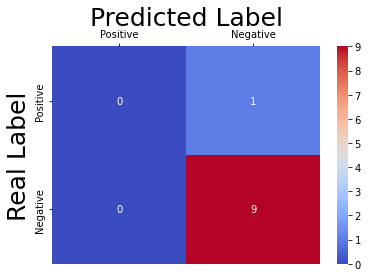

In [4]:
ordered_confusion_matrix(y_true, y_pred)

# Caso 02. Dataset desbalanceado: benchmark todo positivo

In [5]:
y_true = [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
y_pred = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.10      1.00      0.18         1

    accuracy                           0.10        10
   macro avg       0.05      0.50      0.09        10
weighted avg       0.01      0.10      0.02        10



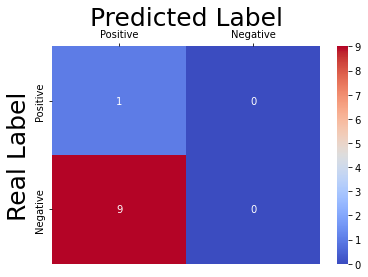

In [6]:
ordered_confusion_matrix(y_true, y_pred)

# Caso 03. Dataset desbalanceado: benchmark random

In [7]:
y_true = [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
y_pred = [1, 0, 1, 0, 1, 0, 1, 0, 1, 0]
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.44      0.57         9
           1       0.00      0.00      0.00         1

    accuracy                           0.40        10
   macro avg       0.40      0.22      0.29        10
weighted avg       0.72      0.40      0.51        10



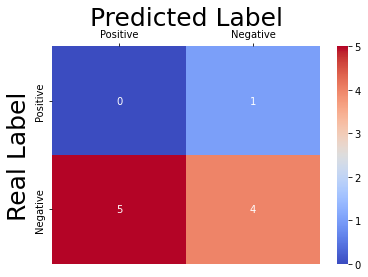

In [8]:
ordered_confusion_matrix(y_true, y_pred)